In [116]:
#coding:utf-8
'''
    FileName      ：process.ipynb
    Author        ：@zch0423
    Date          ：Jan 14, 2021
    Description   ：
    以机械工业为例处理roe数据
    - 数据清洗，去除空行，去除ST股票，更改列名，机械roeData.xlsx为导出数据
    - ROE图绘制
    - ROE平滑化
    - 从平滑化曲线中找到极值
    #TODO 
    - 设置阈值查找极值，比如超过多少
    - detrend 差分去季节性
'''

'\n    FileName      ：process.ipynb\n    Author        ：@zch0423\n    Date          ：Jan 14, 2021\n    Description   ：\n    以机械工业为例处理roe数据\n    - 数据清洗，去除空行，去除ST股票，更改列名，机械roeData.xlsx为导出数据\n    - ROE图绘制\n    - ROE平滑化\n    - 从平滑化曲线中找到极值\n    #TODO \n    - 设置阈值查找极值，比如超过多少\n    - detrend 差分去季节性\n'

In [1]:
import pandas as pd
import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [45]:
from datetime import datetime

In [95]:
import scipy.signal as signal

In [21]:
filePath = "机械设备roe单季度.xlsx"
raw = pd.read_excel(filePath)
raw.head()

,证券代码,证券简称,单季度.净资产收益率ROE_x000D_\n[报告期] 2000第一季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2000第二季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2000第三季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2000第四季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2001第一季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2001第二季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2001第三季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2001第四季度_x000D_\n[单位] %,...,单季度.净资产收益率ROE_x000D_\n[报告期] 2018第三季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2018第四季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2019第一季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2019第二季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2019第三季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2019第四季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2020第一季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2020第二季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2020第三季度_x000D_\n[单位] %,单季度.净资产收益率ROE_x000D_\n[报告期] 2020第四季度_x000D_\n[单位] %
0,000008.SZ,神州高铁,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8794,2.7954,0.1604,0.7463,1.1356,3.9001,-1.4616,-2.5378,0.7020,NaN
1,000039.SZ,中集集团,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5906,...,4.2918,3.0535,1.0623,0.7117,-0.1142,2.3391,-1.6447,1.1583,2.1542,NaN
2,000157.SZ,中联重科,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7083,...,1.1780,1.8944,2.5903,4.1326,2.4141,2.3247,2.6003,7.0930,3.6814,NaN
3,000410.SZ,*ST沈机,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.3626,-161.6999,NaN,NaN,NaN,NaN,-22.5318,-16.5059,-27.6049,NaN
4,000425.SZ,徐工机械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5403,1.8615,3.4380,3.9074,2.2892,1.8277,1.8240,4.2272,1.1084,NaN


In [23]:
def preProcess(data):
    # 数据预处理，去除ST，columns改成2000-03格式
    
    columns = ["code", "name"]
    for year in range(2000, 2021):
        for month in range(3, 13, 3):  # 3 6 9 12
            columns.append("%d-%02d"%(year, month))
    data.columns = columns
    data = data[~(data["name"].isnull())]
    return data[~data["name"].str.contains("ST")]

In [24]:
data = preProcess(raw)

In [43]:
data.head()
data.to_excel("机械roeData.xlsx", index=False)

In [180]:
def drawOneROE(companies):
    '''
    params: companies df类型
    绘制roe曲线
    '''
    # companies 可迭代df类型
    # 绘制公司roe曲线
    fig, axs = plt.subplots(figsize=(14, 6))
    x = [datetime.strptime(d, '%Y-%m').date() for d in companies.columns[2:]]
    for company in companies.itertuples():
        axs.plot(x, company[3:], label=company[1])  # 3: 为roe数据
    fig.legend()

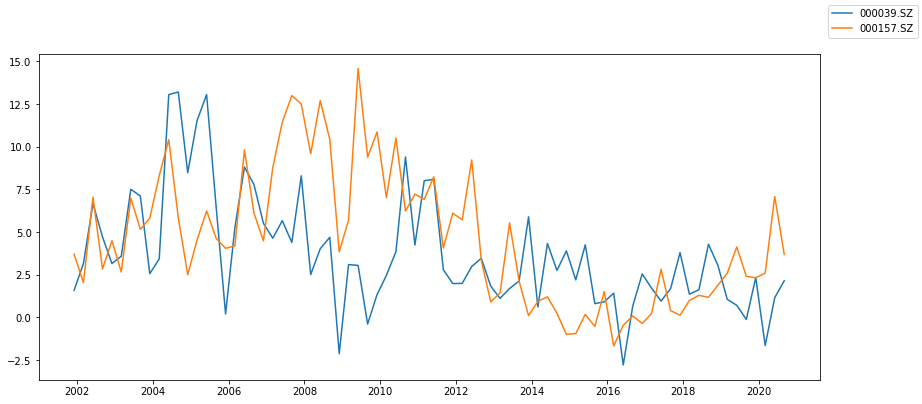

In [51]:
drawOneROE(data.iloc[1:3, :])  # 中集集团 中联重科

In [53]:
data.iloc[1:3, :].head()

,code,name,2000-03,2000-06,2000-09,2000-12,2001-03,2001-06,2001-09,2001-12,...,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09,2020-12
1,000039.SZ,中集集团,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5906,...,4.2918,3.0535,1.0623,0.7117,-0.1142,2.3391,-1.6447,1.1583,2.1542,NaN
2,000157.SZ,中联重科,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7083,...,1.1780,1.8944,2.5903,4.1326,2.4141,2.3247,2.6003,7.0930,3.6814,NaN


In [184]:
def drawRolling(company, n=8, draw=True, gaussian=False):
    '''
    company, Series n, 
    int default 8 draw, 
    bool default True 
    gaussian, bool default False 
    return: yRolling, Series
    '''
    # company Series 
    # 返回rolling后的值

    x = [datetime.strptime(d, '%Y-%m').date() for d in company.index[2:]]
    y = company[2:]
    if gaussian:
        yRolling = y.rolling(n, win_type="gaussian").mean(std=np.std(y, ddof=1))
    else:
        yRolling = y.rolling(n).mean()
    if draw:
        fig, axs = plt.subplots(figsize=(14, 6))
        axs.plot(x, y, label="raw")
        axs.plot(x, yRolling, label="roll")
        fig.legend()
    return yRolling

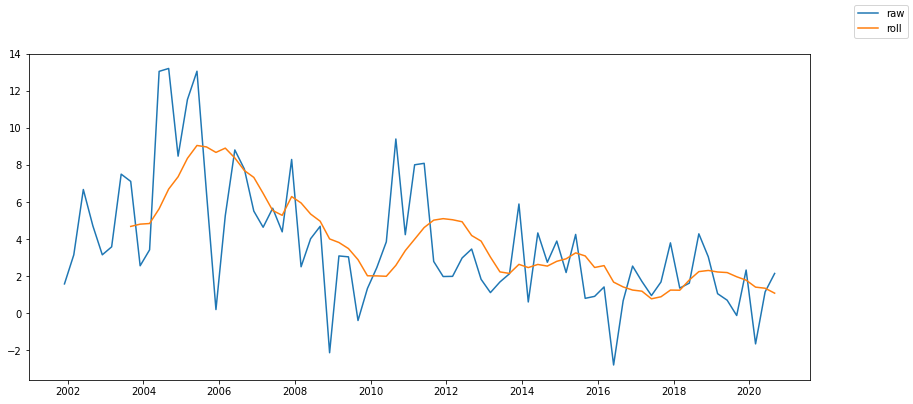

In [97]:
# rolling示例
company = data.iloc[1, :]
yRolling = drawRolling(company, n=8)

In [98]:
yRolling

2000-03         NaN
2000-06         NaN
2000-09         NaN
2000-12         NaN
2001-03         NaN
             ...   
2019-12    1.792612
2020-03    1.416450
2020-06    1.357225
2020-09    1.090025
2020-12         NaN
Name: 1, Length: 84, dtype: float64

In [106]:
def getExtreme(yRolling, company):
    '''
    yRolling, Series; company, Series ;return maxs, mins
    '''
    # 获取极值点，返回极大值和极小值
    y = np.array(yRolling)
    maximum = signal.argrelextrema(y, np.greater)
    minimum = signal.argrelextrema(-y, np.greater)
    maxs = company.iloc[maximum]
    mins = company.iloc[minimum]
    return maxs, mins

In [115]:
# 获取极值
maxs, mins = getExtreme(yRolling, company)
print("极大值")
for i, v in maxs.iteritems():
    print(i, v)
print("极小值")
for i, v in mins.iteritems():
    print(i, v)

极大值
2004-12 8.4815
2005-09 6.4893
2007-06 5.6712
2011-06 8.0941
2013-06 1.6964
2013-12 5.9002
2014-12 3.9016
2015-09 0.8119
2017-06 0.9619
2018-06 1.6321
极小值
2005-06 13.062
2007-03 4.6459
2009-12 1.3463
2013-03 1.1219
2013-09 2.1391
2014-03 0.616
2015-06 4.259
2016-12 2.5516
2017-09 1.6961


In [146]:
data.head()

,code,name,2000-03,2000-06,2000-09,2000-12,2001-03,2001-06,2001-09,2001-12,...,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09,2020-12
0,000008.SZ,神州高铁,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8794,2.7954,0.1604,0.7463,1.1356,3.9001,-1.4616,-2.5378,0.7020,NaN
1,000039.SZ,中集集团,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5906,...,4.2918,3.0535,1.0623,0.7117,-0.1142,2.3391,-1.6447,1.1583,2.1542,NaN
2,000157.SZ,中联重科,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7083,...,1.1780,1.8944,2.5903,4.1326,2.4141,2.3247,2.6003,7.0930,3.6814,NaN
4,000425.SZ,徐工机械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5403,1.8615,3.4380,3.9074,2.2892,1.8277,1.8240,4.2272,1.1084,NaN
5,000528.SZ,柳工,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2561,0.7812,3.1375,3.6226,2.2035,1.3220,1.6257,4.7731,2.8909,NaN


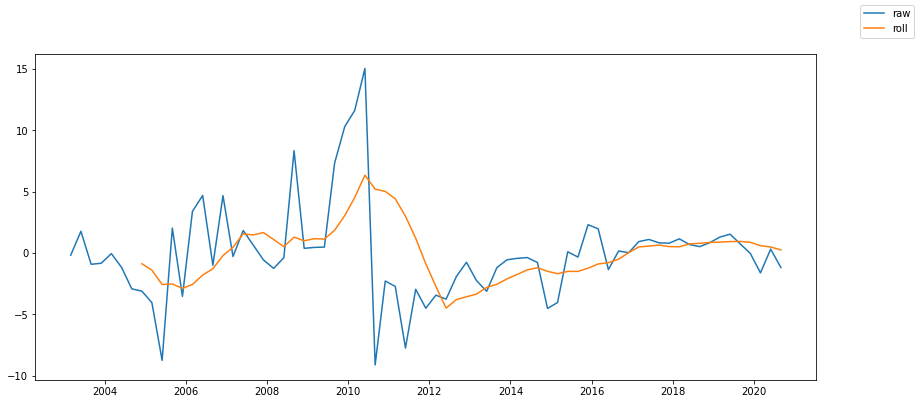

In [175]:
temp = data.diff(4, axis=1).iloc[3, :]  # 季度数据差分
yRolling = drawRolling(temp, gaussian=True, n=8)

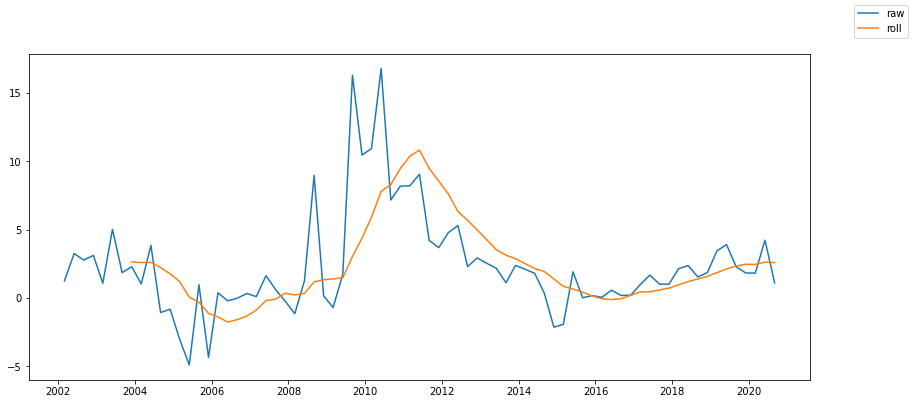

In [170]:
yRolling = drawRolling(data.iloc[3, :],n=8, gaussian=True)

In [171]:
data.iloc[3, :]

code       000425.SZ
name            徐工机械
2000-03          NaN
2000-06          NaN
2000-09          NaN
             ...    
2019-12       1.8277
2020-03       1.8240
2020-06       4.2272
2020-09       1.1084
2020-12          NaN
Name: 4, Length: 86, dtype: object

In [176]:
maxs, mins = getExtreme(yRolling,data.iloc[3, :])
maxs, mins

(2005-03    -3.0062
 2006-12     0.3367
 2007-06     1.6356
 2008-03    -1.1456
 2008-09     8.9521
 2009-12    10.4476
 2014-03     2.1058
 2017-03     0.9815
 2019-03     3.4380
 Name: 4, dtype: object,
 2004-12   -0.8143
 2005-06   -4.8892
 2007-03    0.1023
 2007-12   -0.2300
 2008-06    1.2555
 2008-12    0.1548
 2011-12    3.6812
 2014-09    0.3490
 2017-09    1.0171
 Name: 4, dtype: object)

## 结合股价信息检查59家公司的情况

In [177]:
pricePath = "price59c.xlsx"
price = pd.read_excel(pricePath, index_col=0)

In [178]:
price.head()

,神州高铁000008.SZ,中集集团000039.SZ,中联重科000157.SZ,徐工机械000425.SZ,柳工000528.SZ,冰山冷热000530.SZ,创元科技000551.SZ,苏常柴A000570.SZ,哈工智能000584.SZ,山推股份000680.SZ,...,上海机电600835.SH,上柴股份600841.SH,上工申贝600843.SH,广日股份600894.SH,建设机械600984.SH,贵绳股份600992.SH,上柴B股900920.SH,上工B股900924.SH,机电B股900925.SH,振华B股900947.SH
日期,,,,,,,,,,,,,,,,,,,,,
2000-03-31,6.8169,1.7141,NaN,1.0030,0.9613,2.1426,6.1304,6.3989,2.8847,1.3026,...,4.9487,5.9088,6.8043,2.3801,NaN,NaN,0.0914,0.1255,0.1274,0.0227
2000-06-30,6.6332,2.7344,NaN,1.3443,1.1987,2.6916,5.3171,6.0259,3.9702,3.0431,...,4.9106,5.8948,6.9603,2.6776,NaN,NaN,0.1208,0.1724,0.1532,0.0301
2000-09-29,5.0766,2.2704,NaN,1.3480,1.3141,2.4075,4.5199,6.4132,4.7754,3.1549,...,4.7693,5.7915,7.1729,3.8375,NaN,NaN,0.1364,0.2026,0.1497,0.0319
2000-12-29,4.7376,2.5609,0.3387,1.6333,1.3860,3.0181,4.9933,6.2937,4.0056,2.6120,...,5.8953,6.8016,8.3448,4.2582,NaN,NaN,0.1968,0.3448,0.2146,0.0504
2001-03-30,2.4107,2.8469,0.3196,1.6032,1.3442,2.7422,4.9407,6.2602,4.0881,2.3382,...,5.8482,6.6221,8.4960,4.8635,NaN,NaN,0.3220,0.6298,0.3871,0.0828


In [208]:
# 从roe中筛选和股票对应的59家公司
filtered = data[[True if row in price.columns else False for row in data.name+data.code]]
filtered.to_excel("filteredROE.xlsx", index=False)
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 412
Data columns (total 86 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   code     59 non-null     object 
 1   name     59 non-null     object 
 2   2000-03  0 non-null      float64
 3   2000-06  0 non-null      float64
 4   2000-09  0 non-null      float64
 5   2000-12  0 non-null      float64
 6   2001-03  0 non-null      float64
 7   2001-06  0 non-null      float64
 8   2001-09  3 non-null      float64
 9   2001-12  8 non-null      float64
 10  2002-03  40 non-null     float64
 11  2002-06  40 non-null     float64
 12  2002-09  46 non-null     float64
 13  2002-12  49 non-null     float64
 14  2003-03  48 non-null     float64
 15  2003-06  49 non-null     float64
 16  2003-09  50 non-null     float64
 17  2003-12  58 non-null     float64
 18  2004-03  52 non-null     float64
 19  2004-06  59 non-null     float64
 20  2004-09  59 non-null     float64
 21  2004-12  59 non-n

In [217]:
diff = pd.concat([filtered.iloc[:,:2],filtered.iloc[:,2:].diff(4, axis=1)], axis=1)  # 差分数据
diff.to_excel("diffROE59.xlsx", index=False)
diff.head()

,code,name,2000-03,2000-06,2000-09,2000-12,2001-03,2001-06,2001-09,2001-12,...,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09,2020-12
0,000008.SZ,神州高铁,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.1875,-8.4692,0.0125,0.0281,0.2562,1.1047,-1.6220,-3.2841,-0.4336,NaN
1,000039.SZ,中集集团,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5957,-0.7514,-0.3023,-0.9204,-4.4060,-0.7144,-2.7070,0.4466,2.2684,NaN
2,000157.SZ,中联重科,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7731,1.7620,1.5942,2.8336,1.2361,0.4303,0.0100,2.9604,1.2673,NaN
4,000425.SZ,徐工机械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5232,0.8467,1.2977,1.5365,0.7489,-0.0338,-1.6140,0.3198,-1.1808,NaN
5,000528.SZ,柳工,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8576,0.3048,-0.0064,0.3567,0.9474,0.5408,-1.5118,1.1505,0.6874,NaN


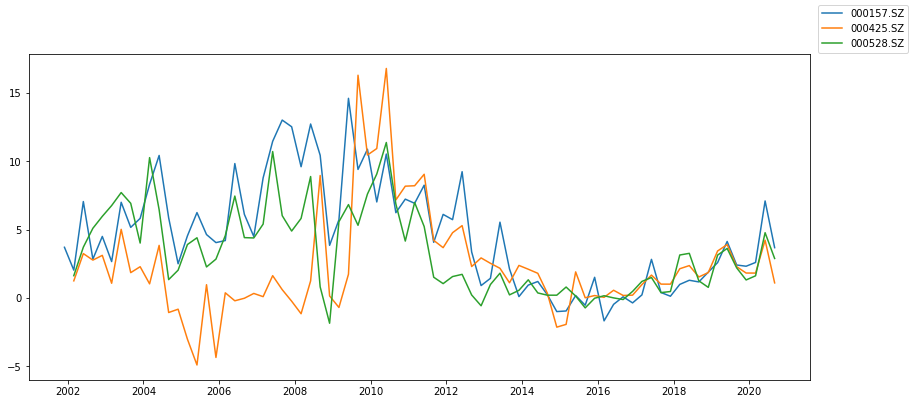

In [229]:
drawOneROE(filtered.iloc[2:5, :])

以下面三个为例
- 000157 中联重科
- 000425 徐工机械
- 000528 柳工

In [232]:
testCompanies = [filtered.iloc[i,:] for i in range(2,5)]
testDiff = [diff.iloc[i,:] for i in range(2, 5)]

ROE


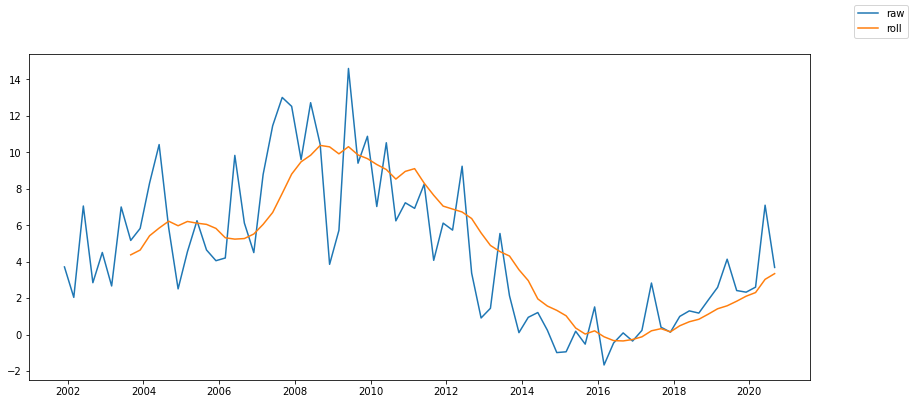

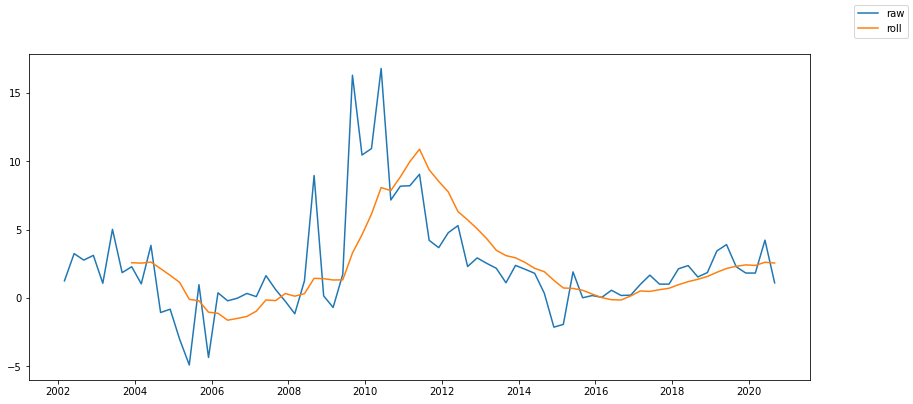

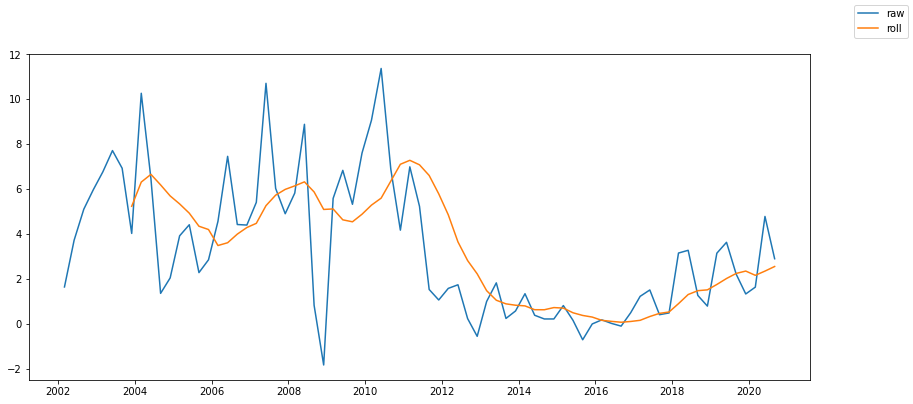

In [245]:
yRollings = []
diffYRollings = []
print("ROE")
for i in range(3):
    yRollings.append(drawRolling(testCompanies[i]))

差分


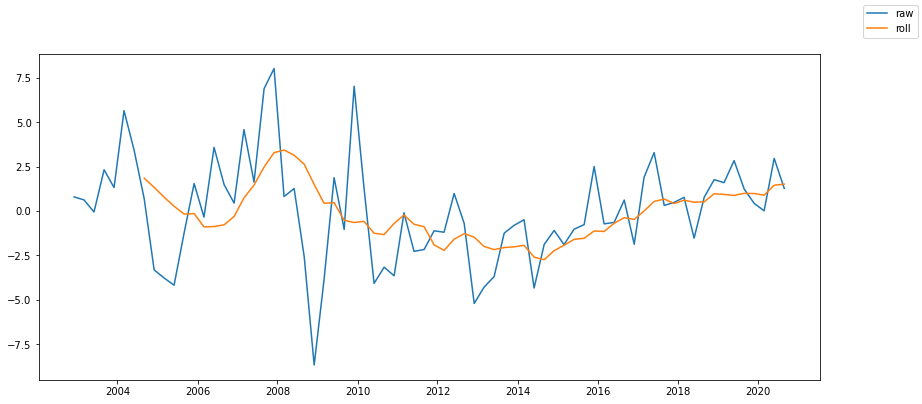

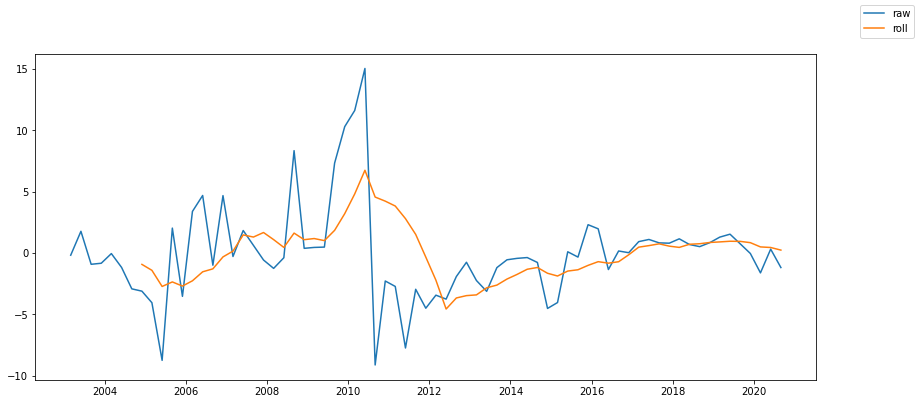

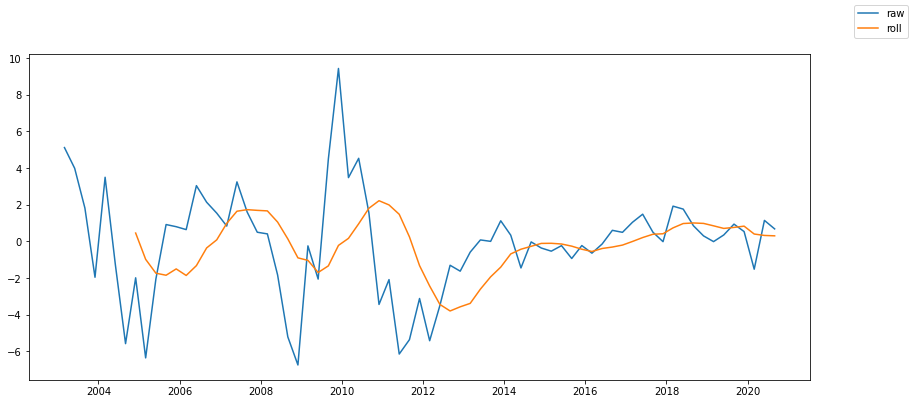

In [246]:
print("差分")
for i in range(3):
    diffYRollings.append(drawRolling(testDiff[i]))

,神州高铁000008.SZ,中集集团000039.SZ,中联重科000157.SZ,徐工机械000425.SZ,柳工000528.SZ,冰山冷热000530.SZ,创元科技000551.SZ,苏常柴A000570.SZ,哈工智能000584.SZ,山推股份000680.SZ,...,上海机电600835.SH,上柴股份600841.SH,上工申贝600843.SH,广日股份600894.SH,建设机械600984.SH,贵绳股份600992.SH,上柴B股900920.SH,上工B股900924.SH,机电B股900925.SH,振华B股900947.SH
日期,,,,,,,,,,,,,,,,,,,,,
2000-03-31,6.8169,1.7141,NaN,1.0030,0.9613,2.1426,6.1304,6.3989,2.8847,1.3026,...,4.9487,5.9088,6.8043,2.3801,NaN,NaN,0.0914,0.1255,0.1274,0.0227
2000-06-30,6.6332,2.7344,NaN,1.3443,1.1987,2.6916,5.3171,6.0259,3.9702,3.0431,...,4.9106,5.8948,6.9603,2.6776,NaN,NaN,0.1208,0.1724,0.1532,0.0301
2000-09-29,5.0766,2.2704,NaN,1.3480,1.3141,2.4075,4.5199,6.4132,4.7754,3.1549,...,4.7693,5.7915,7.1729,3.8375,NaN,NaN,0.1364,0.2026,0.1497,0.0319
2000-12-29,4.7376,2.5609,0.3387,1.6333,1.3860,3.0181,4.9933,6.2937,4.0056,2.6120,...,5.8953,6.8016,8.3448,4.2582,NaN,NaN,0.1968,0.3448,0.2146,0.0504
2001-03-30,2.4107,2.8469,0.3196,1.6032,1.3442,2.7422,4.9407,6.2602,4.0881,2.3382,...,5.8482,6.6221,8.4960,4.8635,NaN,NaN,0.3220,0.6298,0.3871,0.0828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,3.6178,9.6612,6.5049,5.4179,6.7808,3.8986,6.6800,4.5900,6.2581,3.6500,...,16.2260,7.0321,7.6900,7.3533,10.33,6.8211,0.4359,0.4580,1.4183,0.3208
2020-03-31,3.1294,7.5853,5.5408,5.0019,6.1164,3.7002,7.3400,4.2700,5.3998,3.1800,...,13.2980,6.4950,6.2700,7.1281,12.39,6.1549,0.3769,0.4070,1.0520,0.2809
2020-06-30,2.9400,7.2300,6.2614,5.8537,6.3100,3.3134,9.8200,4.4500,5.5300,3.4300,...,16.5785,6.9327,6.5900,6.8500,24.80,6.1450,0.3237,0.3400,0.9707,0.2080


In [283]:
def drawPrice(companyName, companyCode, roeData, priceData, n=8, gaussian=False):
    '''
    Description: 绘制股价走势，平滑曲线，roe变化
    ---
    Params:一列数据
    ---
    Returns:
    '''
    company = roeData[roeData["code"] == companyCode]
    x = [datetime.strptime(d, '%Y-%m').date() for d in company.columns[2:]]
    yROE = company.iloc[0,2:]
    if gaussian:
        yRolling = yROE.rolling(n, win_type="gaussian").mean(std=np.std(yROE, ddof=1))
    else:
        yRolling = yROE.rolling(n).mean()
    fig, axs = plt.subplots(figsize=(14, 6))
    # ROE 和平滑曲线
    axs.plot(x, yROE, label="ROE")
    axs.plot(x, yRolling, label="roll ROE")
    # 股价走势
    priceLabel = companyName+companyCode
    price = priceData[priceLabel]
    axs.plot(x, price.values, label="price")
    fig.legend()
    

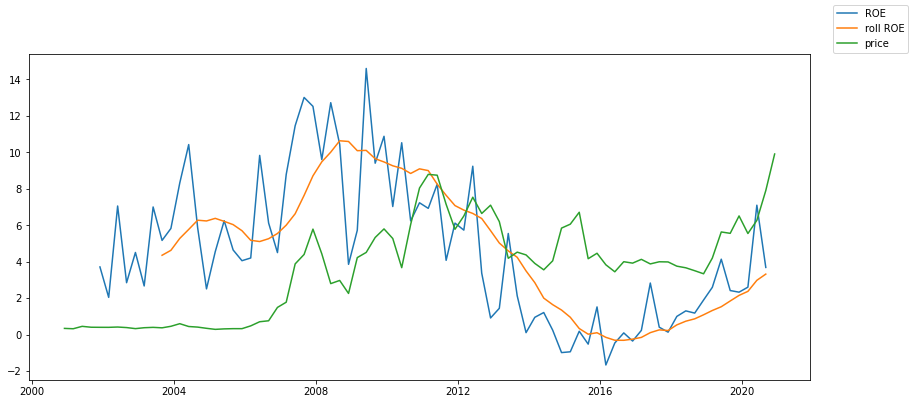

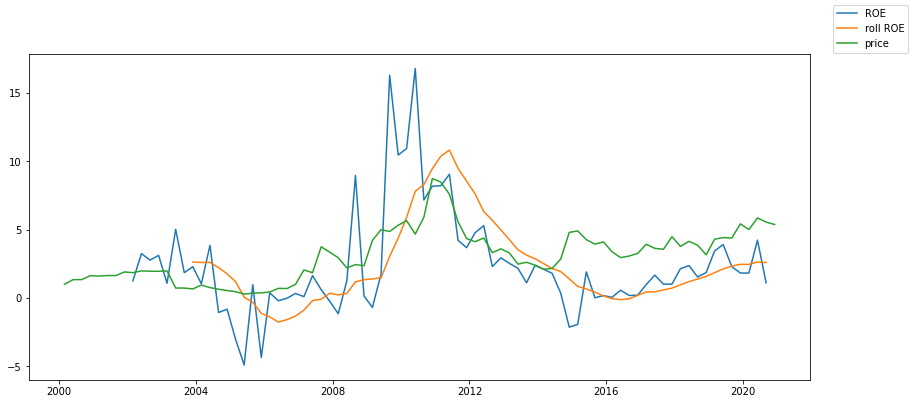

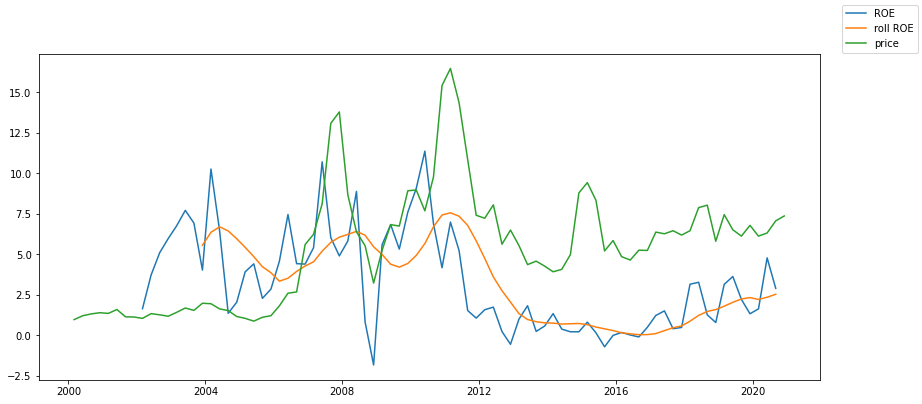

In [284]:
drawPrice("中联重科", "000157.SZ", filtered, price, gaussian=True)
drawPrice("徐工机械", "000425.SZ", filtered, price, gaussian=True)
drawPrice("柳工", "000528.SZ", filtered, price, gaussian=True)

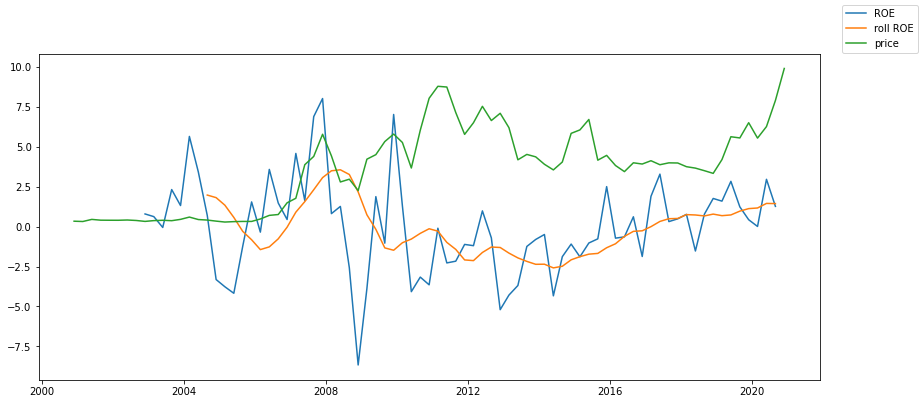

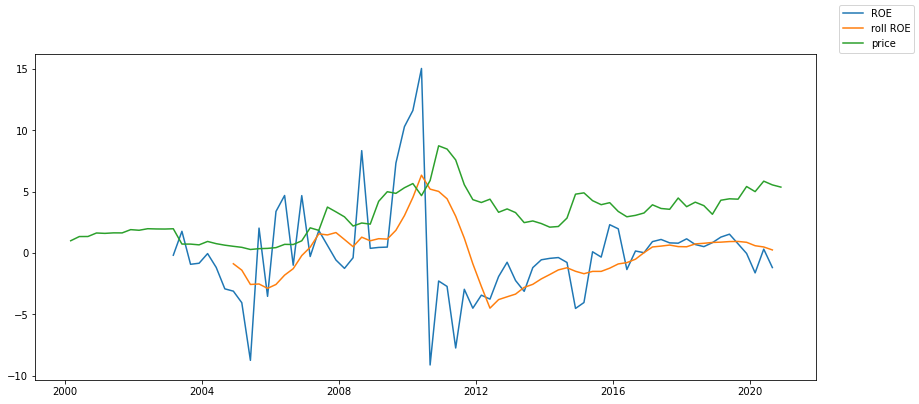

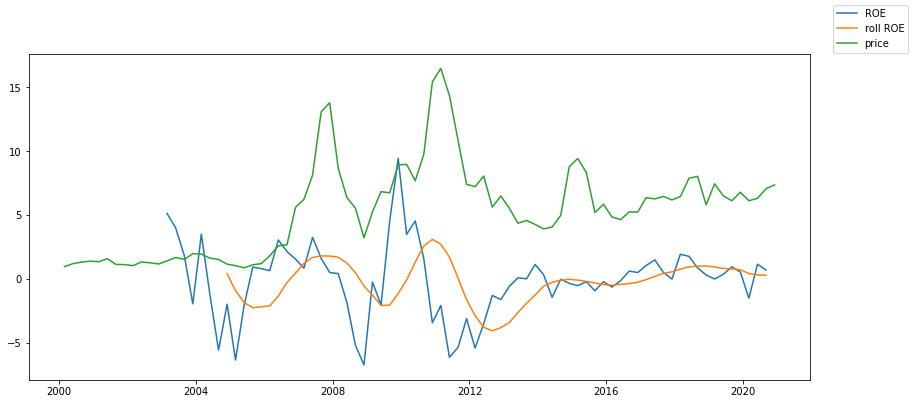

In [285]:
# diff
drawPrice("中联重科", "000157.SZ", diff, price, gaussian=True)
drawPrice("徐工机械", "000425.SZ", diff, price, gaussian=True)
drawPrice("柳工", "000528.SZ", diff, price, gaussian=True)